### illustration of study region 

In [2]:
import numpy as np
from PIL import Image 
from glob import glob
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from utils.add_scale_north import add_scale_bar, add_north_arrow


In [ ]:
basemap = Image.open('data/basemap/natural-earth-1_large4096px.png')
path_dianchi = 'data/dianchi-lake/hydrolake_dianchi_edit.gpkg'
path_chaohu = 'data/chaohu-lake/hydrolake_chaohu.gpkg' 
path_gyaring = 'data/gyaring-lake/hydrolake_gyaring.gpkg'
path_hulun = 'data/hulun-lake/hydrolake_hulun.gpkg'
path_siling_co = 'data/siling_co-lake/hydrolake_siling_co.gpkg'
paths_lake = [path_dianchi, path_chaohu, path_gyaring, path_hulun, path_siling_co]


In [ ]:
center_lakes = [] 
lakes_gdf = []
for path in paths_lake:
    lake_gdf = gpd.read_file(path)
    center_lakes.append(lake_gdf.geometry[0].centroid)
    lakes_gdf.append(lake_gdf)
center_lakes


[<POINT (102.688 24.817)>,
 <POINT (117.536 31.572)>,
 <POINT (97.262 34.93)>,
 <POINT (117.398 48.946)>,
 <POINT (88.986 31.787)>]

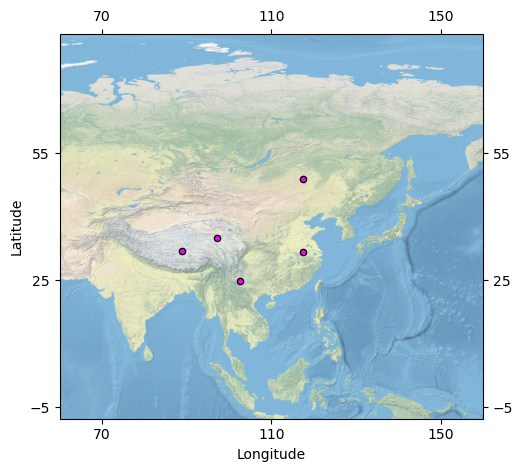

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([60, 160, -5, 80])
ax.imshow(basemap, extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree()) 
lons = [pt.x for pt in center_lakes]
lats = [pt.y for pt in center_lakes]
ax.scatter(lons, lats, s=20, c='magenta', edgecolors='black', transform=ccrs.PlateCarree(), zorder=10)
ax.set_xticks(np.arange(70, 170, 40), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-5, 81, 30), crs=ccrs.PlateCarree())
ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True, 
               right=True, labelright=True, left=True, labelleft=True)
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax.tick_params(labelsize=10)


In [39]:
dianchi_lake, chaohu_lake, gyaring_lake, hulun_lake, siling_co_lake = lakes_gdf


Text(0.5, 1.0, 'Siling Co Lake')

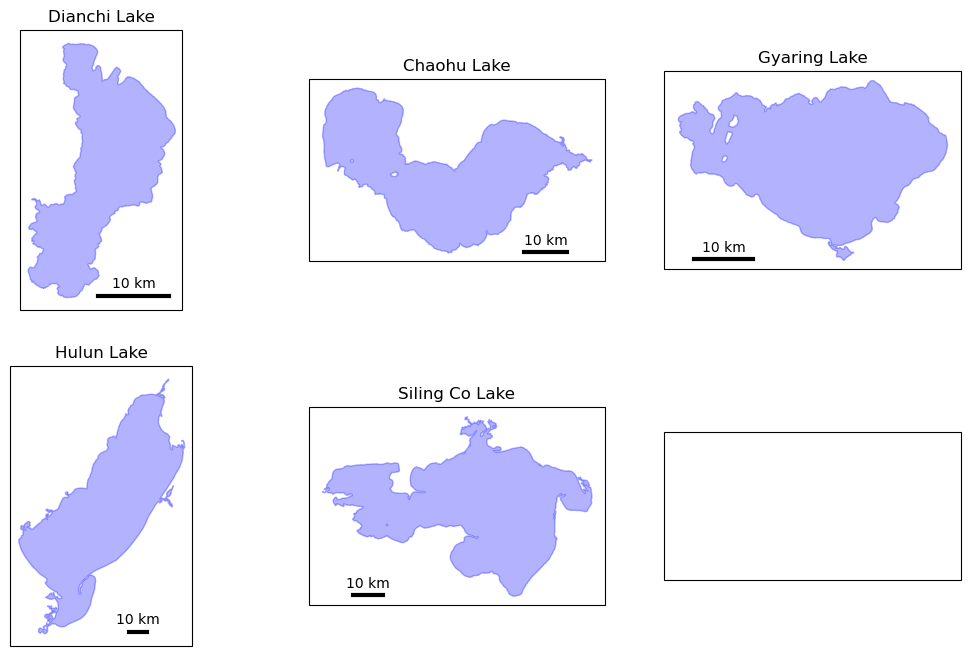

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(13, 8), subplot_kw={'projection': ccrs.PlateCarree()})
dianchi_lake.plot(ax=ax[0, 0], color='blue', edgecolor='blue', alpha=0.3) 
add_scale_bar(ax = ax[0, 0],loc=(0.7, 0.05),length=10); 
ax[0, 0].set_title('Dianchi Lake', fontsize=12)
chaohu_lake.plot(ax=ax[0, 1], color='blue', edgecolor='blue', alpha=0.3)
add_scale_bar(ax = ax[0, 1],loc=(0.8, 0.05),length=10);
ax[0, 1].set_title('Chaohu Lake', fontsize=12)
gyaring_lake.plot(ax=ax[0, 2], color='blue', edgecolor='blue', alpha=0.3)
add_scale_bar(ax = ax[0, 2],loc=(0.2, 0.05),length=10);
ax[0, 2].set_title('Gyaring Lake', fontsize=12)
hulun_lake.plot(ax=ax[1, 0], color='blue', edgecolor='blue', alpha=0.3)
add_scale_bar(ax = ax[1, 0],loc=(0.7, 0.05),length=10);
ax[1, 0].set_title('Hulun Lake', fontsize=12)
siling_co_lake.plot(ax=ax[1, 1], color='blue', edgecolor='blue', alpha=0.3)
add_scale_bar(ax = ax[1, 1],loc=(0.2, 0.05),length=10);
ax[1, 1].set_title('Siling Co Lake', fontsize=12)
